# Premier Neurone

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


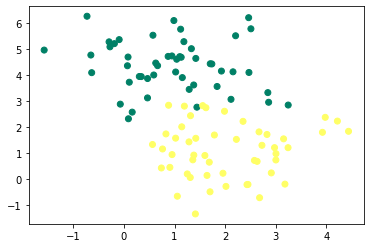

In [49]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## 2. Fonctions du modele

In [50]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [51]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [52]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A+epsilon) - (1 - y) * np.log(1 - A+epsilon))


In [53]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [54]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [55]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
from tqdm import tqdm

In [58]:
def artificial_neuron(X_train, y_train, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_Loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        A_train = model(X_train, W, b)

        if i %10 == 0:
            train_Loss.append(log_loss(A_train, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

        dW, db = gradients(A_train, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_Loss, label = 'train loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label = 'train accuracy')
    plt.legend()
    plt.show()

    print("Score sur le train set : ", accuracy_score(y_train, y_pred))

    return (W, b)


100%|██████████| 1000/1000 [00:00<00:00, 28054.61it/s]


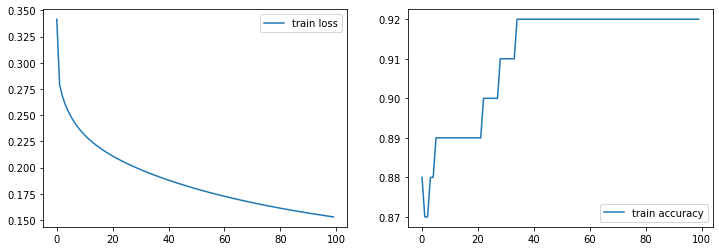

Score sur le train set :  0.92


In [59]:
W, b = artificial_neuron(X, y)

## 3. Frontiere de décision

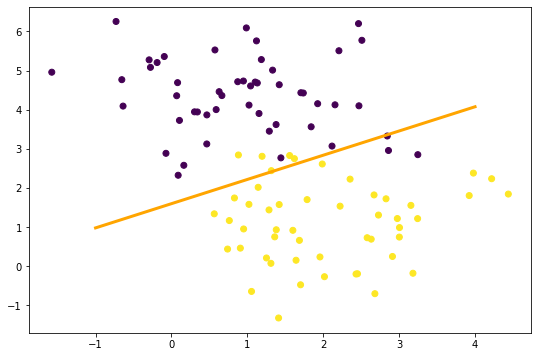

In [60]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y)

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

## 4. Visualisations 3D

In [61]:
import plotly.graph_objects as go

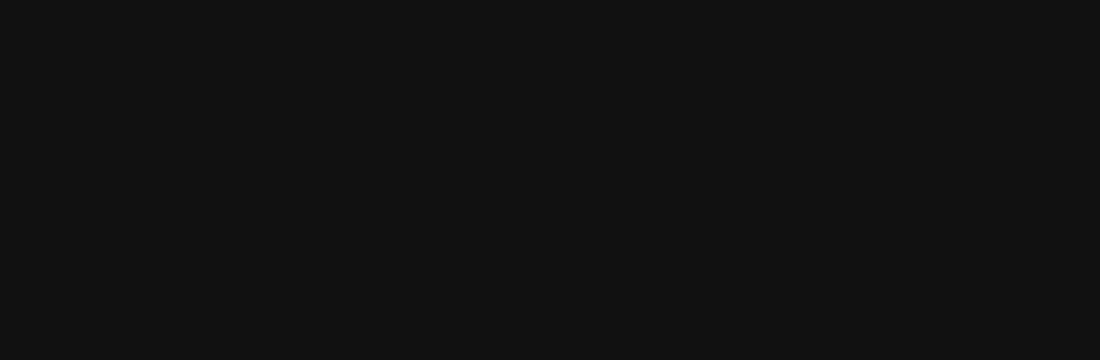

In [62]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

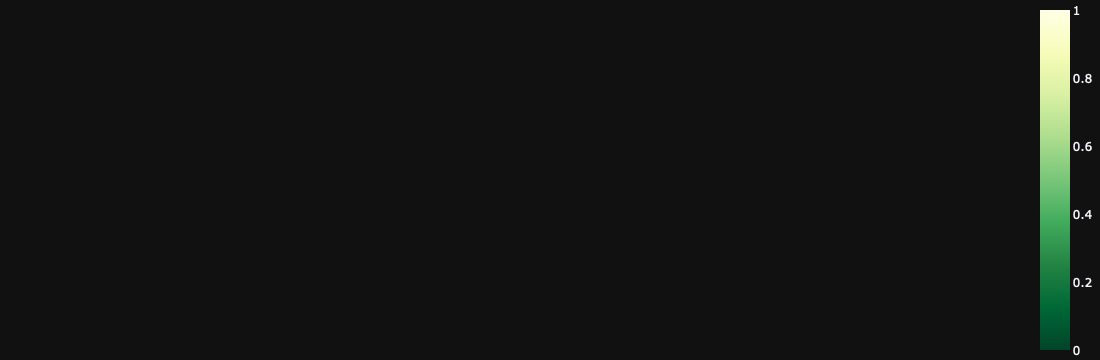

In [63]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


## 5. Problème : c'est un modèle linéaire

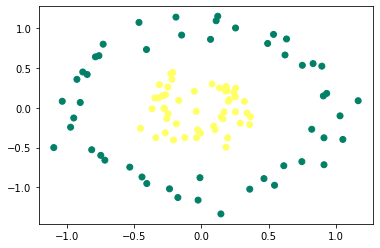

In [64]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=100, noise = 0.1, factor = 0.3, random_state = 0)
y = y.reshape((y.shape[0], 1))

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 27647.95it/s]


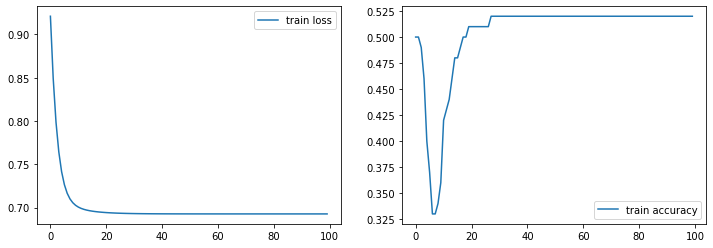

Score sur le train set :  0.52


In [65]:
W, b = artificial_neuron(X, y)

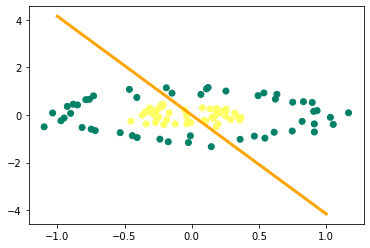

In [66]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 1, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

## 6. Application : Cat vs Dog

In [67]:
import h5py

In [68]:
#!pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
from utilities import *

In [69]:
X_train, y_train, X_test, y_test = load_data()

In [70]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [71]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/Users/yannwalkowiak/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



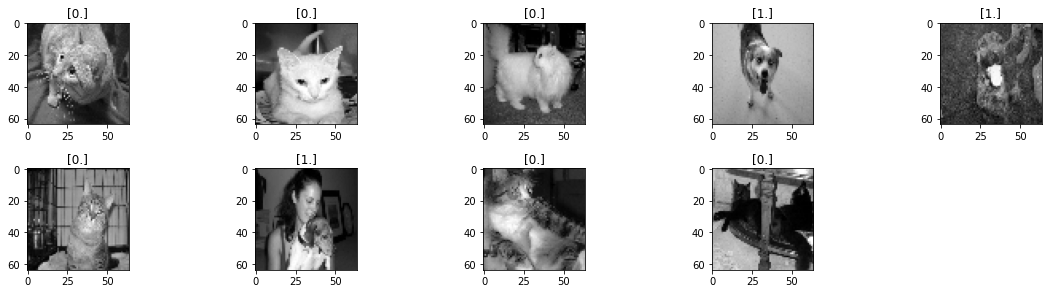

In [72]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [73]:
# aplatissement + normalisation
X_train_norm = X_train.reshape(X_train.shape[0], -1)/X_train.max()
X_test_norm = X_test.reshape(X_test.shape[0], -1)/X_train.max()

In [74]:
# On adapte l'algorithme pour calculer en même temps le test_loss et test_acc

def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_Loss = []
    train_acc = []
    test_Loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A_train = model(X_train, W, b)
        A_test = model(X_test, W, b)

        if i %10 == 0:
            train_Loss.append(log_loss(A_train, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            test_Loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))


        dW, db = gradients(A_train, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_Loss, label = 'train loss')
    plt.plot(test_Loss, label = 'test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label = 'train accuracy')
    plt.plot(test_acc, label = 'test accuracy')
    plt.legend()
    plt.show()

    print("score sur le test set : ", accuracy_score(y_test, y_pred))

    return (W, b)


100%|██████████| 10000/10000 [00:29<00:00, 339.11it/s]


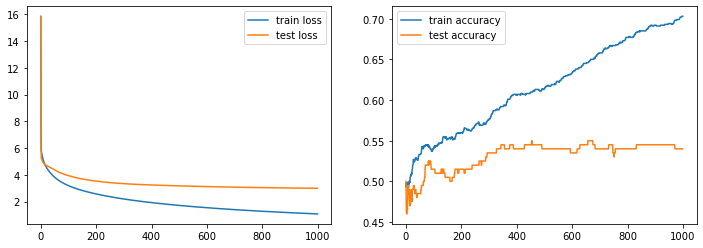

score sur le test set :  0.54


In [75]:
W, b = artificial_neuron(X_train_norm, y_train,X_test_norm, y_test, learning_rate=0.01, n_iter=10000)